In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# D is data
#eps is epsilon distnace
#minpt is minimum point

def MY_DBSCAN_Algo(D,eps,minpt):

    #defining cluster labels
    #initially all cluster labels will be zero
    #C is the cluster for new point
    #-1 if datapoint is noise
    labels=[0]*len(D)
    
    #intially zero clusters
    C=0
    
    #loop to take all points to create clusters
    for P in range(0,len(D)):
        #if point is already has clusters
        if labels[P]!=0:
            continue
        
        #getting all the neighbouring points
        neighbor_pts=regionQuery(D,P,eps)
        
        if(len(neighbor_pts) < minpt):
            labels[P]=-1
            #its a noise
        else:
            C=C+1
            #grow a cluster if P satisfies both conditions 
            grow_Cluster(D, labels, P, neighbor_pts, C, eps, minpt)
            
    return labels 
             

In [3]:
def grow_Cluster(D, labels, P, neighbor_pts, C, eps, minpt):
    '''
    Growing the cluster C which has seed point P
    All the points in neighborhood P can be eligible to be part of Cluster C 
    After the execution Cluster C growing will do done
    '''
    #Seed Point Cluster Declaration
    labels[P]=C
    i=0
    while i <len(neighbor_pts):
        P_next=neighbor_pts[i]
        
        #If P_next is defined Noise during seed search (doesnt's have enough neighbors)
        # Then it can't be a Expansion Point 
        #Hence make it a part of Cluter C and move to next point
        if labels[P_next]==-1:
            labels[P_next]=C
            
        #If point is not claimed earlier, then make it part of Cluster C    
        elif labels[P_next]==0:
            labels[P_next]=C
            
            #find the all the neigbors points to P_next
            P_next_neighbor_pts=regionQuery(D,P_next,eps)
            
            #if P_next has least min neighbors, 
            #then its a can be added to neighbors list of C
            if len(P_next_neighbor_pts) >= minpt:
                neighbor_pts=neighbor_pts+P_next_neighbor_pts
        
        i=i+1
        # Advance to the next point in list
    
        #Cluster C is compelete after this        
                
        

In [4]:
def regionQuery(D,P,eps):
    '''This function retuns the neighboring points from point P within eps distance
    '''
    neighbors=list()
    for Px in range(0,len(D)):
        if(np.linalg.norm((D[P] - D[Px]),2))< eps:
            neighbors.append(Px)
    return neighbors

In [18]:
df=pd.read_csv("dataset1.txt",delimiter=" ",header=None)
from sklearn.preprocessing import StandardScaler
df_s1 = StandardScaler().fit_transform(df)


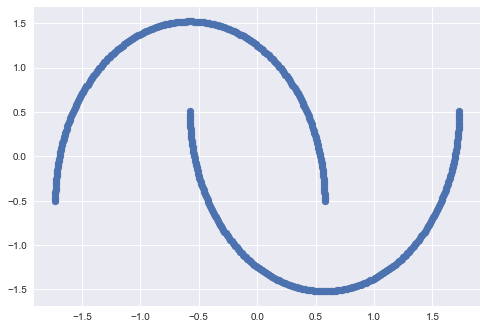

In [29]:
plt.scatter(df_s1[:,0] ,df_s1[:,1] )
plt.show()

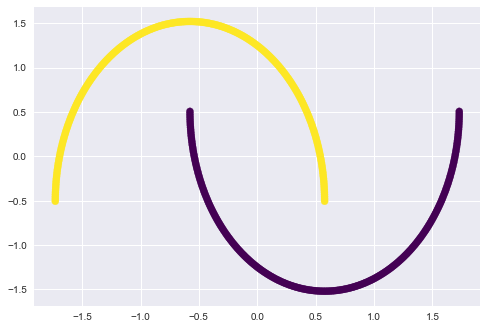

In [27]:
#Clustering using DBSCAN using dataset 1
Clusters=MY_DBSCAN_Algo(df_s1 ,0.3,15)
plt.scatter(df_s1[:, 0], df_s1[:, 1], c=Clusters, s=50, cmap='viridis')

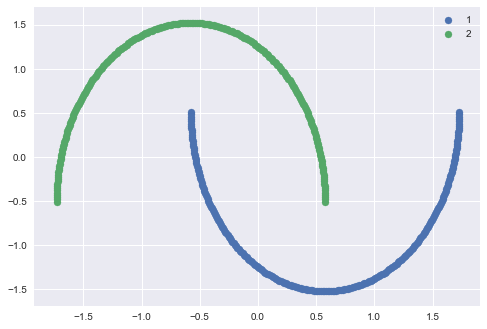

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
feats = df_s1
target = Clusters

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()

In [28]:
#Cluster distribtuion of dataset1 using DBSCAN
from collections import Counter
print("Cluster Distribution of Dataset 1",Counter(Clusters))

Cluster Distribution of Dataset 1 Counter({1: 250, 2: 250})


In [22]:
c=pd.DataFrame(Clusters)
d=pd.DataFrame(df)
c.columns=["clusters"]
df_cluster_1=pd.concat((d,c),axis=1)

In [23]:
df2=pd.read_csv("dataset2.txt",delimiter=" ",header=None)
from sklearn.preprocessing import StandardScaler
df_s2 = StandardScaler().fit_transform(df2)

In [40]:
#Clustering using DBSCAN using dataset1
Clusters_dataset_2=MY_DBSCAN_Algo(df_s2 ,0.4,150)


In [42]:
#Cluster distribtuion of dataset2 using DBSCAN
from collections import Counter
print("Cluster Distribution of Dataset 2",Counter(Clusters_dataset_2))

Cluster Distribution of Dataset 2 Counter({2: 330, 1: 165, -1: 5})


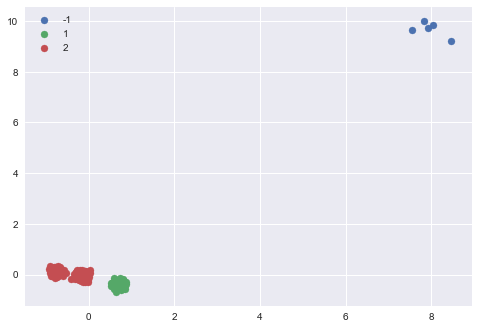

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
feats = df_s2
target = Clusters_dataset_2

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()